# Outline

### Answers to the key questions in the projects 
This part should be in the last as I did it to answer the questions in project letter after I finished the part 1 in Task in Exercise 4.10. But I don't know how to move those big part to the end. 
### 1. Create new column 'region' in 'customer' file
### 2. Create new column 'region' in the merged file
### 3. Exclude the customers who contribute small 
### 4. Customer profile
### 5. Visualizations based on the 'customer profile'
### 6. Aggregation for usage frequency and prices
### 7. Compare the customer profile with regions and department





# Answers to the key questions in the projects

In [3]:
df_merge_x = pd.read_pickle(os.path.join(fpath,'Prepared data', 'Entire_updated_merged_upd1.pkl'))

### key question 1: the busiest days in a week and busiest periods in a day

<AxesSubplot:>

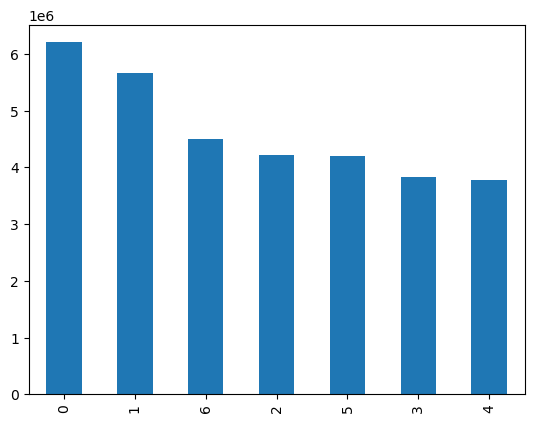

In [4]:
df_merge_x['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

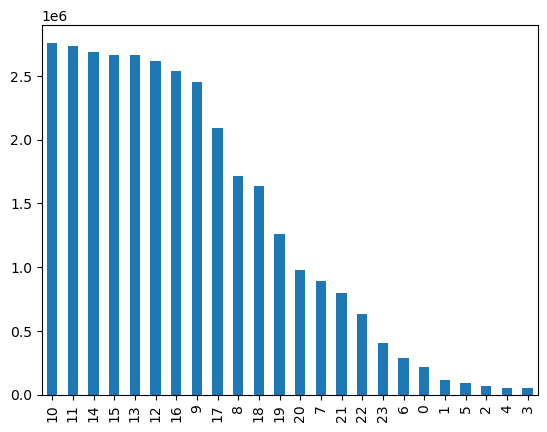

In [5]:
df_merge_x['order_hour_of_day'].value_counts().plot.bar()

### key question 2: special periods in a day when the customers spend most

<AxesSubplot:xlabel='order_hour_of_day'>

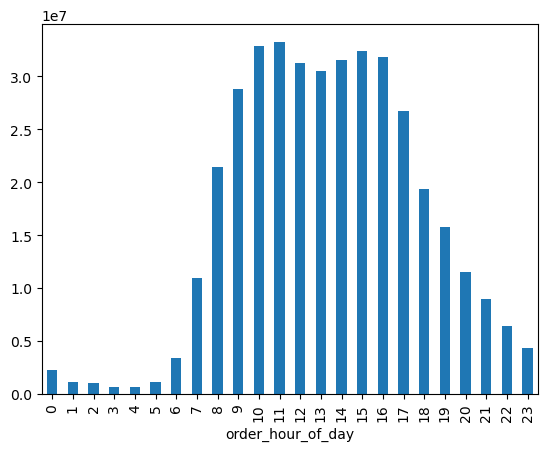

In [6]:
df_merge_x.groupby('order_hour_of_day')['prices'].sum().plot.bar()

### key question 3: to create price range

In [19]:
df_merge_x['order_frequency'] = df_merge_x['order_frequency'].replace({'frequent customer':'frequent','regular customer':'regular','non-frequent customer':'non-fre'})

<AxesSubplot:>

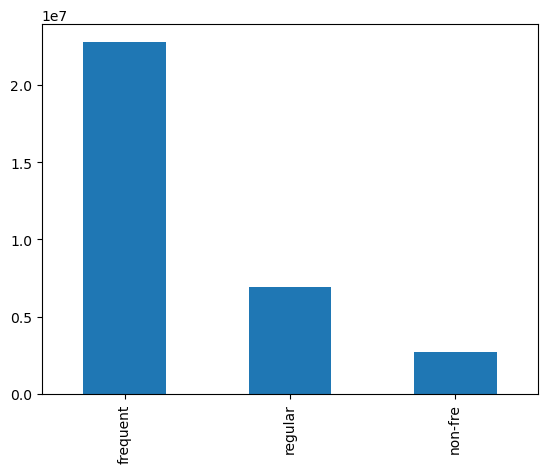

In [20]:
df_merge_x['order_frequency'].value_counts().plot.bar()

### key question 5-3: loyalty flag

<AxesSubplot:xlabel='loyalty_flag'>

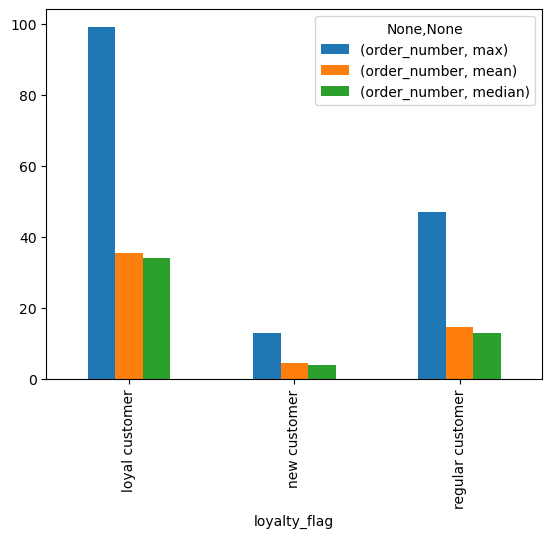

In [21]:
df_merge_x.groupby('loyalty_flag').agg({'order_number':['max','mean','median']}).plot.bar()

### key question 4: popular products and departments

<AxesSubplot:>

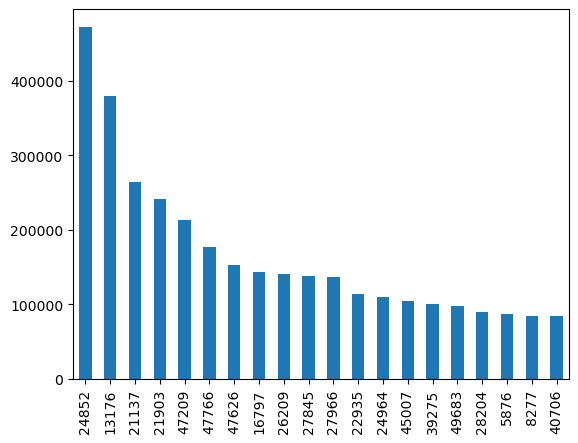

In [41]:
df_merge_x['product_id'].value_counts().head(20).plot.bar()

<AxesSubplot:>

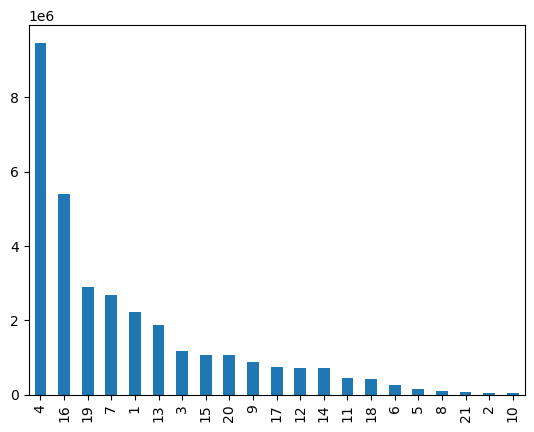

In [42]:
df_merge_x['department_id'].value_counts().plot.bar()

### key question 5-1

<AxesSubplot:>

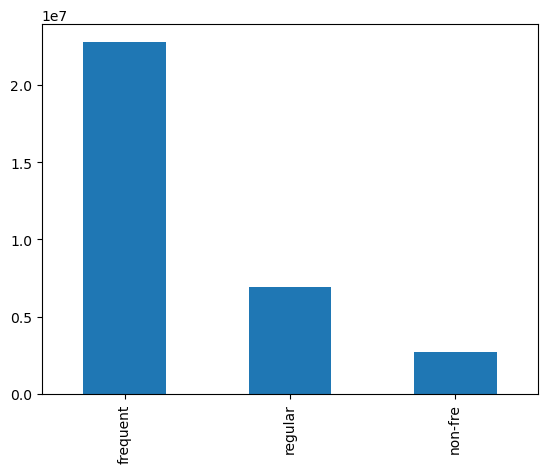

In [43]:
df_merge_x['order_frequency'].value_counts().plot.bar()

### key question 5-2: loyalty customer classification

<AxesSubplot:>

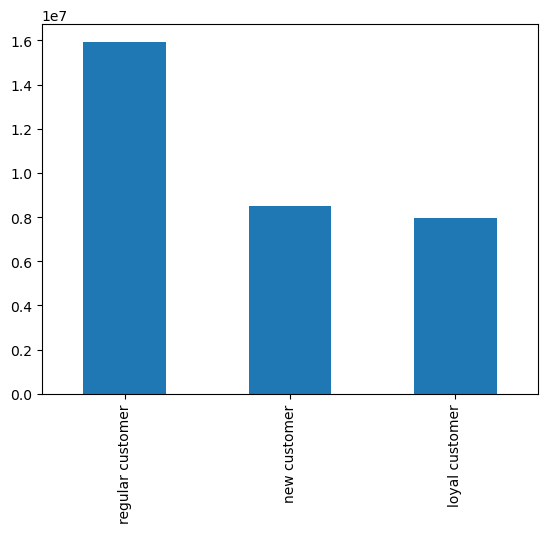

In [44]:
df_merge_x['loyalty_flag'].value_counts().plot.bar()

### key question 5-3: region and order habits

In [29]:
crosstab_region_spender = pd.crosstab(df1['region'],df1['spender_flag'], dropna = False)

<AxesSubplot:xlabel='region'>

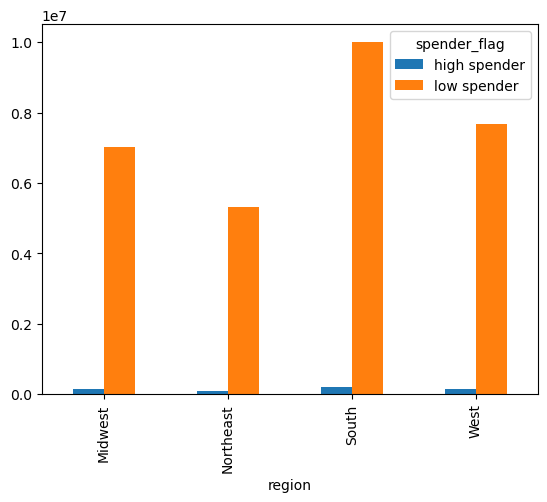

In [30]:
crosstab_region_spender.plot.bar()

### key question 5-4:  family status and spender flag

In [22]:
df1 = pd.read_pickle(os.path.join(fpath,'Prepared data','merged_customer_upd1.pkl'))

In [23]:
crosstab_fami_spender = pd.crosstab(df1['family_status'],df1['spender_flag'], dropna = False)

<AxesSubplot:xlabel='family_status'>

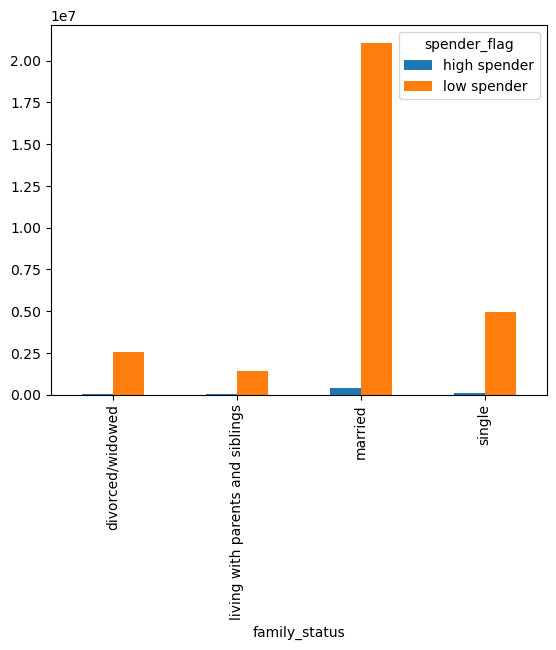

In [25]:
crosstab_fami_spender.plot.bar()

In [31]:
crosstab_fami_spender

spender_flag,high spender,low spender
family_status,,
divorced/widowed,50487,2579586
living with parents and siblings,28109,1442760
married,420514,21089438
single,96460,4923498


### key question 6: please reference to part 5 in this file

### key question 7: please reference to key question 5-4

# 1. Create new column 'region' in 'customer' file

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sn
import matplotlib as plt
import scipy as sp

In [2]:
fpath = r'C:\Users\Mei\Instacart Basket Analysis\02 Data'

In [3]:
df_cust = pd.read_csv(os.path.join(fpath,'Prepared data','customers_clean.csv'), index_col = False)

In [4]:
df_cust.loc[df_cust['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']),'region']= 'Northeast'
df_cust.loc[df_cust['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']),'region']= 'Midwest'
df_cust.loc[df_cust['state'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region']= 'South'
df_cust.loc[df_cust['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','Washington','New Mexico','Alaska','Oregon','California','Hawaii']),'region']= 'West'

In [6]:
df_cust['region'].value_counts()

South        64981
West         49655
Midwest      45868
Northeast    34446
Name: region, dtype: int64

In [7]:
df_cust.to_csv(os.path.join(fpath,'Prepared data','customer_upd1.csv'), index = False)

# 2. Create new column 'region' in the merged file

## 2.1 Import files

In [9]:
df_merged_1 = pd.read_pickle(os.path.join(fpath,'Prepared data','merged_cusotmer.pkl'))

## 2.2 Create new column 'region' 

In [11]:
df_merged_1.loc[df_merged_1['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']),'region']= 'Northeast'
df_merged_1.loc[df_merged_1['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']),'region']= 'Midwest'
df_merged_1.loc[df_merged_1['state'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region']= 'South'
df_merged_1.loc[df_merged_1['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','Washington','New Mexico','Alaska','Oregon','California','Hawaii']),'region']= 'West'

In [12]:
df_merged_1['region'].value_counts()

South        10199357
West          7832096
Midwest       7177172
Northeast     5422227
Name: region, dtype: int64

## 2.3 Crosstab between 'region' and 'spender_flag'

In [13]:
df_merged_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30630852 entries, 0 to 30630851
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   product_id         int64  
 1   department_id      int64  
 2   prices             float64
 3   user_id            int64  
 4   order_number       int64  
 5   order_day_of_week  int64  
 6   order_hour_of_day  int64  
 7   loyalty_flag       object 
 8   spender_flag       object 
 9   gender             object 
 10  age                int64  
 11  n_dependants       int64  
 12  family_status      object 
 13  income             int64  
 14  state              object 
 15  region             object 
dtypes: float64(1), int64(9), object(6)
memory usage: 3.9+ GB


In [14]:
crosstab = pd.crosstab(df_merged_1['region'],df_merged_1['spender_flag'], dropna = False)

In [15]:
crosstab

spender_flag,high spender,low spender
region,,
Midwest,149821,7027351
Northeast,101421,5320806
South,196525,10002832
West,147803,7684293


### Conclusions: 
1) For high spenders: there are most high spenders in South; there are least high spenders in Northeast. 

2) For low spenders; it gives the same result, i.e., there are most low spenders in South, and least low spenders in Northeast

I would say that the reason is related to the total number of the customers for each region: South has the biggest number of customers, which induces a corresponding higher probability of having more high spenders and more lower spenders than other regions. 

In [17]:
df_merged_1.to_pickle(os.path.join(fpath,'Prepared data','merged_customer_upd1.pkl'))

# 3. Exclude the customers who contribute small 

In [18]:
df_merged_1.head(3)

,product_id,department_id,prices,user_id,order_number,order_day_of_week,order_hour_of_day,loyalty_flag,spender_flag,gender,age,n_dependants,family_status,income,state,region
0,1,19,5.8,138,28,6,11,regular customer,low spender,Male,81,1,married,49620,Minnesota,Midwest
1,1,19,5.8,138,30,6,17,regular customer,low spender,Male,81,1,married,49620,Minnesota,Midwest
2,907,12,20.0,138,1,5,13,regular customer,low spender,Male,81,1,married,49620,Minnesota,Midwest


In [19]:
df_merged_1.loc[df_merged_1['order_number'] < 5, 'activity_flag'] = 'low activity'
df_merged_1.loc[df_merged_1['order_number'] >= 5, 'activity_flag'] = 'high activity'

In [20]:
df_merged_1['activity_flag'].value_counts()

high activity    23076894
low activity      7553958
Name: activity_flag, dtype: int64

In [21]:
df_high_act = df_merged_1[df_merged_1['activity_flag'] == 'high activity']

In [22]:
df_high_act['activity_flag'].value_counts()

high activity    23076894
Name: activity_flag, dtype: int64

In [23]:
df_high_act.to_pickle(os.path.join(fpath,'Prepared data','high_activity_sample.pkl'))

# 4. Customer profile

In [25]:
df_merged_1.loc[df_merged_1['order_number'] <= 5, 'favorite_flag'] = 'normal'
df_merged_1.loc[(df_merged_1['order_number'] > 5) & (df_merged_1['order_number'] < 10), 'favorite_flag'] ='like'
df_merged_1.loc[df_merged_1['order_number'] >= 10, 'favorite_flag'] = 'very much'

In [26]:
df_merged_1['favorite_flag'].value_counts()

very much    16673874
normal        9093434
like          4863544
Name: favorite_flag, dtype: int64

In [39]:
list = ['user_id','age','income','n_dependants','region','product_id','prices','favorite_flag','department_id','order_day_of_week']

In [40]:
df_cust_profi = df_merged_1[list]

In [41]:
df_cust_profi.head(3)

,user_id,age,income,n_dependants,region,product_id,prices,favorite_flag,department_id,order_day_of_week
0,138,81,49620,1,Midwest,1,5.8,very much,19,6
1,138,81,49620,1,Midwest,1,5.8,very much,19,6
2,138,81,49620,1,Midwest,907,20.0,normal,12,5


In [42]:
df_cust_profi.to_pickle(os.path.join(fpath,'Prepared data','customer_profile.pkl'))

# 5. Visualizations based on the 'customer profile'

## 5.1 Bar chart of variable 'n_dependants'

In [17]:
fpath_out = r'C:\Users\Mei\Instacart Basket Analysis\04 Analysis'

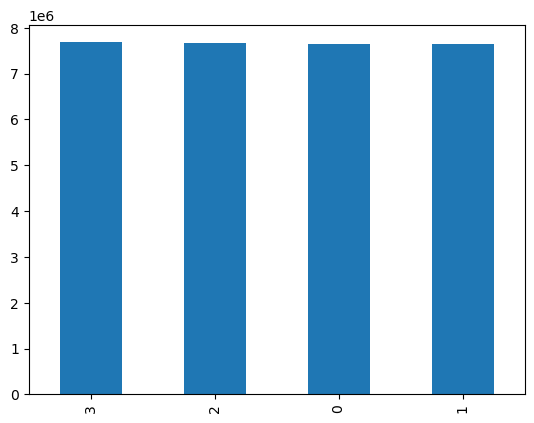

In [44]:
Bar1 = df_cust_profi['n_dependants'].value_counts().plot.bar()

In [45]:
Bar1.figure.savefig(os.path.join(fpath_out,'bar_ndependants.png'))

### Conclusions: The distribution of n_dependants is uniform

## 5.2 Histogram of income

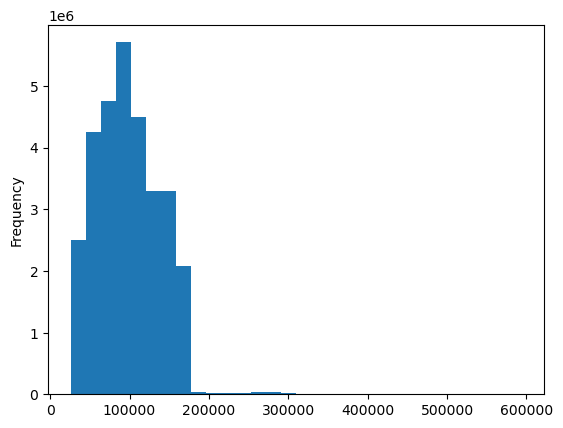

In [46]:
histo_income =df_cust_profi['income'].plot.hist(bins = 30)

In [47]:
histo_income.figure.savefig(os.path.join(fpath_out,'histo_income.png'))

### Conclusions: 

1) Very a few customers have an income of more 20,0000 dollars

2) When we only consider the income that is less than 200000 dollars, the distribution can be seen symmetrical to the income around 100000 that most customers have

## 5.3  Scatter plot between age and income

### 1) Representative sample

In [48]:
np.random.seed(5)

In [49]:
dev = np.random.rand(len(df_cust_profi)) <= 0.7

In [50]:
big_sam = df_cust_profi[dev]

In [51]:
small_sam = df_cust_profi[~dev]

In [52]:
df_cust_profi.shape

(30630852, 10)

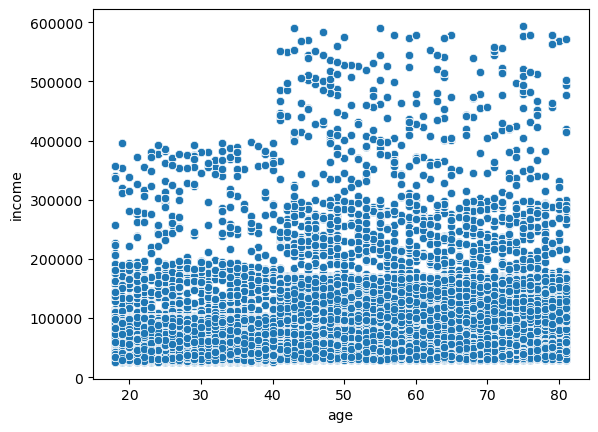

In [53]:
Scatter_age_income = sn.scatterplot(x = 'age', y= 'income', data = small_sam)

#### By comparing the output between small_sam and big_sam, it can be proven that the small_sam can be taken as a valid sample that can represent the whole population

In [54]:
Scatter_age_income.figure.savefig(os.path.join(fpath_out,'scatter_age_income.png'))

### 2) Relation between age and income

### Conclusions:

1) For the income that is more than 200000 dollars, the customers whose age is around and more than 40 years old make up a large proportion.

2) Most customers whose age is less than 40 years old have an income that is less than 200000 dollars. 

## 5.4 Linechart of 'age' and 'n_dependant'

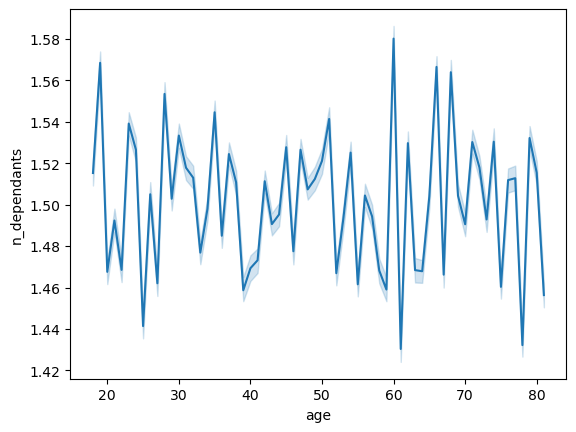

In [55]:
line_age_ndep = sn.lineplot(data = small_sam, x = 'age', y = 'n_dependants')

### Conclusions: No obvious relation between 'age' and 'n_dependans' is found. 

In [56]:
line_age_ndep.figure.savefig(os.path.join(fpath_out,'line_age_ndep.png'))

## 5.5 Favorite departments

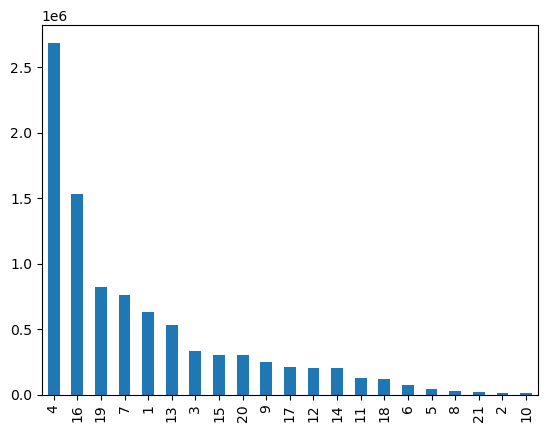

In [57]:
bar_department = small_sam['department_id'].value_counts().plot.bar()

### Conclusions: 

1) The top five departments that the customers buy the most products are departments 4, 16, 19, 7 and 1.

2) The five departments that the customers buy the lestt products are departments 2, 5, 8, 10 and 21. 

In [58]:
bar_department.figure.savefig(os.path.join(fpath_out,'bar_department.png'))

# 6. Aggregation for usage frequency and prices

In [3]:
df_cust_profile = pd.read_pickle(os.path.join(fpath,'Prepared data', 'customer_profile.pkl'))

### Mode day in a week : on which day a user buys stuff most frequently in a week

In [5]:
df_cust_profile.groupby('user_id')['order_day_of_week'].agg(pd.Series.mode)

user_id
1         4
2         2
3         0
4         4
5         3
         ..
206205    4
206206    0
206207    1
206208    2
206209    1
Name: order_day_of_week, Length: 194950, dtype: object

### Mean, max and min for the expenditure

In [6]:
df_cust_profile.groupby('user_id').agg({'prices': ['mean','max','min']})

prices           
             mean   max  min
user_id                     
1        6.367797  14.0  1.0
2        7.515897  14.8  1.3
3        8.197727  14.4  1.3
4        8.205556  14.6  1.4
5        9.189189  14.8  3.2
...           ...   ...  ...
206205   8.909375  23.8  1.4
206206   7.646667  14.8  1.1
206207   7.313453  24.7  1.2
206208   8.366617  21.6  1.1
206209   7.058915  18.8  1.1

[194950 rows x 3 columns]

# 7. Compare the customer profile with regions and department

## 7.1 customer profile with regions

In [4]:
df_cust_profile.head(2)

,user_id,age,income,n_dependants,region,product_id,prices,favorite_flag,department_id,order_day_of_week
0,138,81,49620,1,Midwest,1,5.8,very much,19,6
1,138,81,49620,1,Midwest,1,5.8,very much,19,6


In [10]:
df_cust_profile.groupby('region').agg({'income': ['median','min','max']})

income               
            median    min     max
region                           
Midwest    97329.0  25903  579397
Northeast  96805.0  26072  584097
South      96087.0  25911  591089
West       96567.0  25941  593901

In [14]:
df_cust_profile.groupby('region').agg({'age':['median','min','max']})

age        
          median min max
region                  
Midwest     49.0  18  81
Northeast   50.0  18  81
South       49.0  18  81
West        50.0  18  81

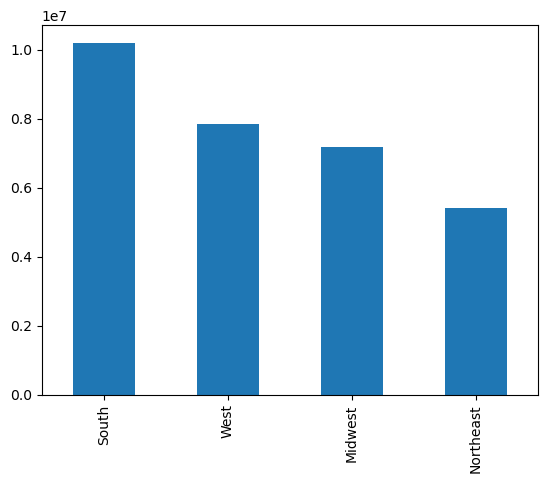

In [16]:
Bar_region = df_cust_profile['region'].value_counts().plot.bar()

In [18]:
Bar_region.figure.savefig(os.path.join(fpath_out,'bar_region.png'))

In [19]:
df_cust_profile.groupby('region')['department_id'].agg(pd.Series.mode)

region
Midwest      4
Northeast    4
South        4
West         4
Name: department_id, dtype: int64

### Conclusion 

1) For each region, the customers visit the department 4 most frequently.

2) There are more customers from South than other regions. 